In [1]:
#import sys
# # !{sys.executable} -m pip install cartopy
# !{sys.executable} -m pip install cmocean
#!{sys.executable} -m pip install rasterio
#!{sys.executable} -m pip install pyschism
#!{sys.executable} -m pip install cfunits
#!{sys.executable} -m pip install udunits2 #this did NOT work
#!{sys.executable} conda install -c conda-forge udunits2>=2.2.25


In [2]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
#from pathlib import Path4
#edit 12/04
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
#try adding
#import cfunits
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection

print("Modules imported!")


ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/geoplot/share/proj failed
/global/home/users/jennaisrael/.local/lib/python3.11/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Modules imported!


In [3]:
#import Sienna's plotting library
import schism_plot_lib_12_04 as spl
import time

In [4]:
#What is the change in inundation? Do dry cells become wet?
#take the min value of each cell over the day (is it ever wet) and subtract the historical, negative values are now wet used to be dry (less dry)
fn = "/global/scratch/users/jennaisrael/run_schism/run_26/outputs/"
run = spl.SchismOutput(output_folder=fn)
ds=run.Result(run,variable = "dryflag", filenumber=147)

fn2 = "/global/scratch/users/jennaisrael/run_schism/run_25/outputs/"
run2 = spl.SchismOutput(output_folder=fn2)
dslr1 = run2.Result(run2, variable = "dryflag", filenumber=147)

fn3 = "/global/scratch/users/jennaisrael/run_schism/run_27/outputs/"
run3 = spl.SchismOutput(output_folder=fn3)
dslr2 = run3.Result(run3, variable = "dryflag", filenumber=147)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_26/outputs/ ... 

Found 3331 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates
/global/scratch/users/jennaisrael/run_schism/run_26/outputs/out2d_147.nc
Loading in /global/scratch/users/jennaisrael/run_schism/run_26/outputs/out2d_147.nc
Loaded in dataset! 

<xarray.DataArray 'dryFlagNode' (time: 48, nSCHISM_hgrid_node: 305834)> Size: 59MB
[14680032 values with dtype=float32]
Coordinates:
  * time     (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node
Attributes:
    i23d:     1
TIME [12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200

In [5]:
dry_diff1=dslr1.dataset-ds.dataset
dslr1.dataset=dry_diff1
dry_diff2=dslr2.dataset-ds.dataset
dslr2.dataset=dry_diff2

Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Data already depth averaged ... 
Loaded in hgrid.gr3 file...

Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


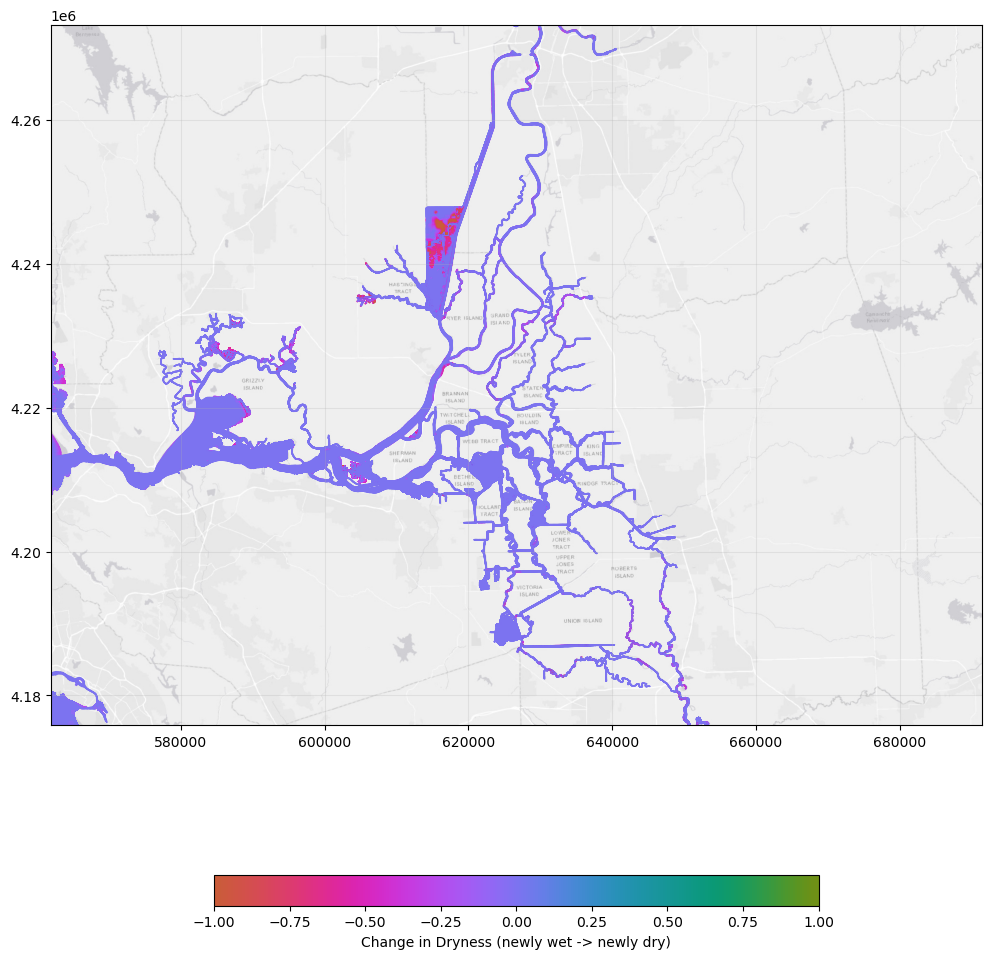

In [6]:
fig2, ax2 = dslr1.plot_variable(run, domain="Delta", time="average",depth= "2D",titlestr="0.8 m RLSR - Historical Salinity 08/23/2014")

Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Data already depth averaged ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


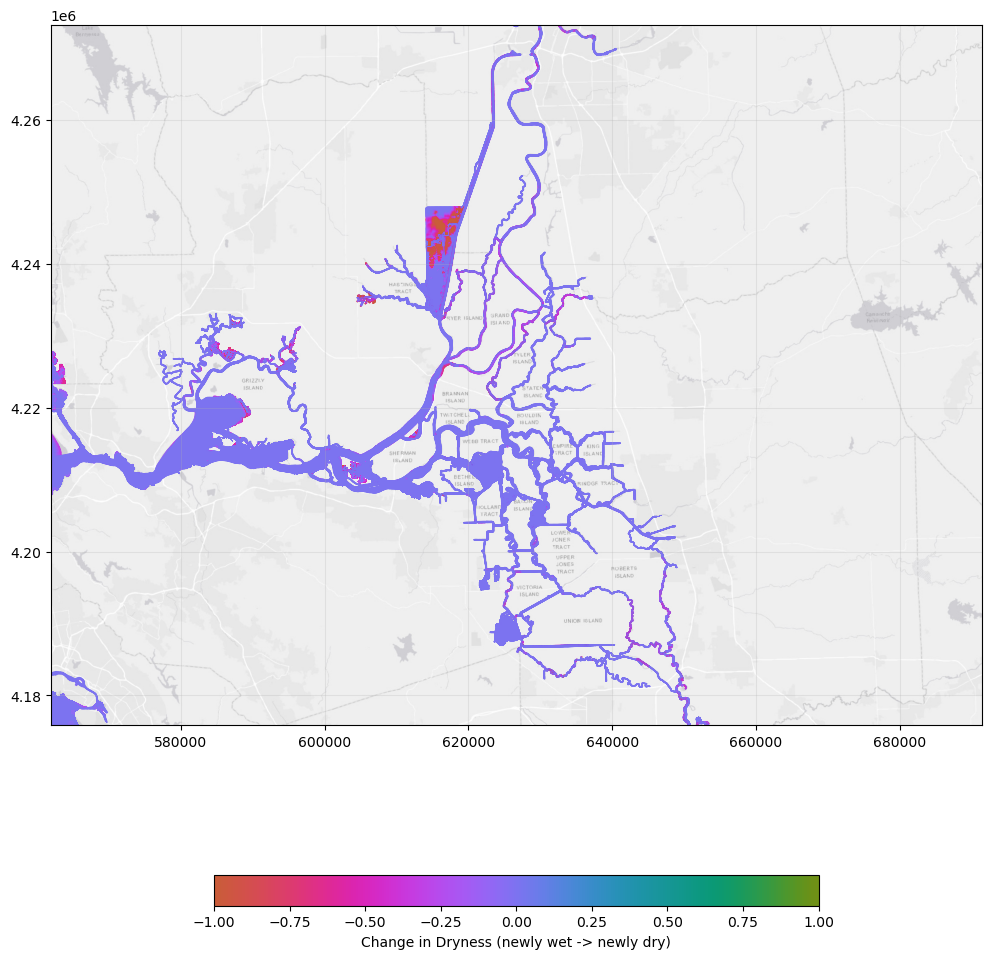

In [8]:
fig3, ax3 = dslr2.plot_variable(run, domain="Delta", time="average",depth= "2D",titlestr="1.2 m RLSR - Historical Salinity 08/23/2014")

In [3]:
dataset = xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_26/outputs/out2d_147.nc")
dataset

<xarray.Dataset> Size: 564MB
Dimensions:                  (time: 48, one: 1, nSCHISM_hgrid_node: 305834,
                              nSCHISM_hgrid_face: 328232,
                              nMaxSCHISM_hgrid_face_nodes: 4,
                              nSCHISM_hgrid_edge: 634580, two: 2)
Coordinates:
  * time                     (time) float64 384B 1.262e+07 ... 1.27e+07
Dimensions without coordinates: one, nSCHISM_hgrid_node, nSCHISM_hgrid_face,
                                nMaxSCHISM_hgrid_face_nodes,
                                nSCHISM_hgrid_edge, two
Data variables: (12/13)
    minimum_depth            (one) float64 8B ...
    SCHISM_hgrid_node_x      (nSCHISM_hgrid_node) float64 2MB ...
    SCHISM_hgrid_node_y      (nSCHISM_hgrid_node) float64 2MB ...
    depth                    (nSCHISM_hgrid_node) float32 1MB ...
    bottom_index_node        (nSCHISM_hgrid_node) int32 1MB ...
    SCHISM_hgrid_face_nodes  (nSCHISM_hgrid_face, nMaxSCHISM_hgrid_face_nodes) int32 5MB ...
    ...                       ...
    dryFlagNode              (time, nSCHISM_hgrid_node) float32 59MB ...
    elevation                (time, nSCHISM_hgrid_node) float32 59MB ...
    dryFlagElement           (time, nSCHISM_hgrid_face) float32 63MB ...
    dryFlagSide              (time, nSCHISM_hgrid_edge) float32 122MB ...
    barotropicPresGradX      (time, nSCHISM_hgrid_edge) float32 122MB ...
    barotropicPresGradY      (time, nSCHISM_hgrid_edge) float32 122MB ...

In [5]:
dataset.dryFlagNode

<xarray.DataArray 'dryFlagNode' (time: 48, nSCHISM_hgrid_node: 305834)> Size: 59MB
[14680032 values with dtype=float32]
Coordinates:
  * time     (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node
Attributes:
    i23d:     1

In [8]:
dataset.dryFlagNode.sum(dim="nSCHISM_hgrid_node")

<xarray.DataArray 'dryFlagNode' (time: 48)> Size: 192B
array([34056., 33078., 32416., 32065., 31856., 31974., 33099., 34500.,
       36353., 38222., 39802., 41173., 42567., 43603., 44662., 45575.,
       46213., 46754., 47124., 47336., 47108., 46585., 45672., 44654.,
       43504., 42331., 41096., 40019., 39288., 39005., 39117., 39657.,
       40148., 40405., 40812., 41408., 41942., 42363., 42899., 43207.,
       43221., 43047., 42605., 42014., 41338., 40345., 38939., 37388.],
      dtype=float32)
Coordinates:
  * time     (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07

In [17]:
maxtime=dataset.dryFlagNode.sum(dim="nSCHISM_hgrid_node").idxmax(dim="time")
print(maxtime)

<xarray.DataArray 'time' ()> Size: 8B
array(12650400.)


In [18]:
dataset.dryFlagNode.sel(time=maxtime)

<xarray.DataArray 'dryFlagNode' (nSCHISM_hgrid_node: 305834)> Size: 1MB
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
    time     float64 8B 1.265e+07
Dimensions without coordinates: nSCHISM_hgrid_node
Attributes:
    i23d:     1

In [4]:
dataset = xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_26/outputs/out2d_100.nc").elevation

In [5]:
dataset

<xarray.DataArray 'elevation' (time: 48, nSCHISM_hgrid_node: 305834)> Size: 59MB
[14680032 values with dtype=float32]
Coordinates:
  * time     (time) float64 384B 8.555e+06 8.557e+06 ... 8.638e+06 8.64e+06
Dimensions without coordinates: nSCHISM_hgrid_node
Attributes:
    i23d:     1

Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Data already depth averaged ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


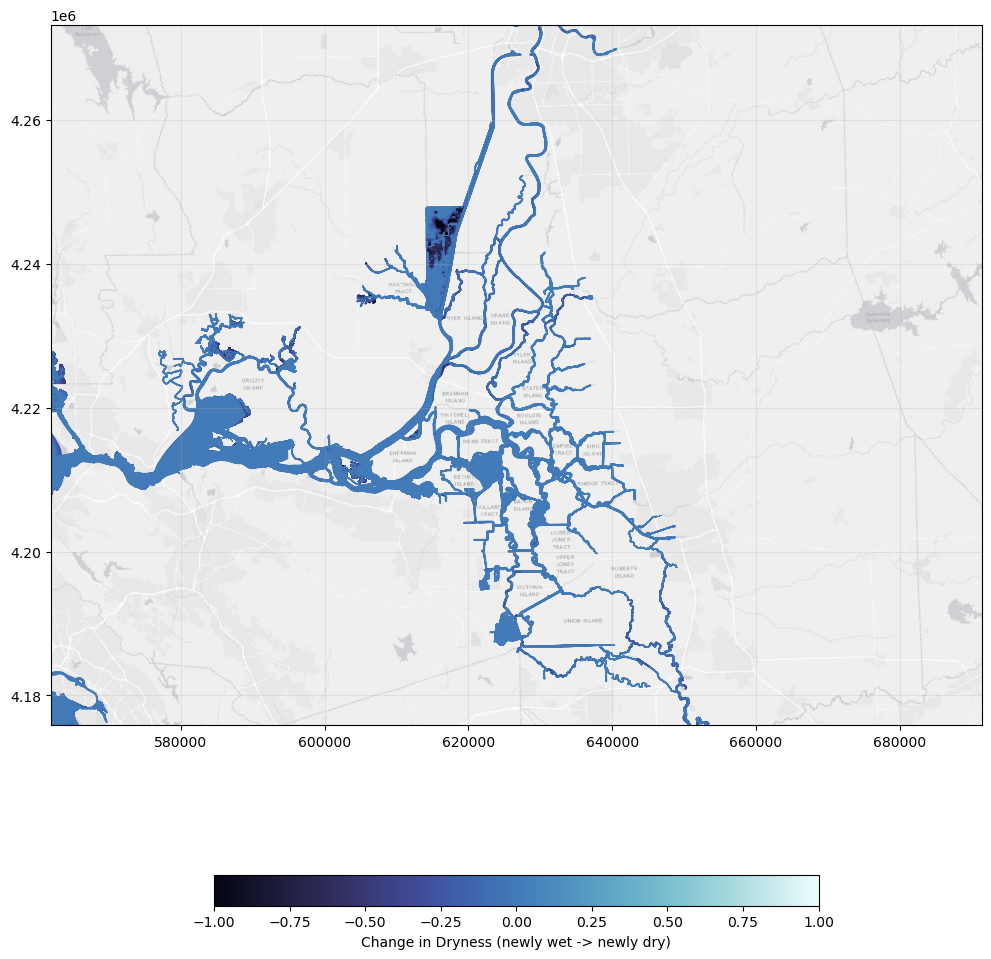

Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Data already depth averaged ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


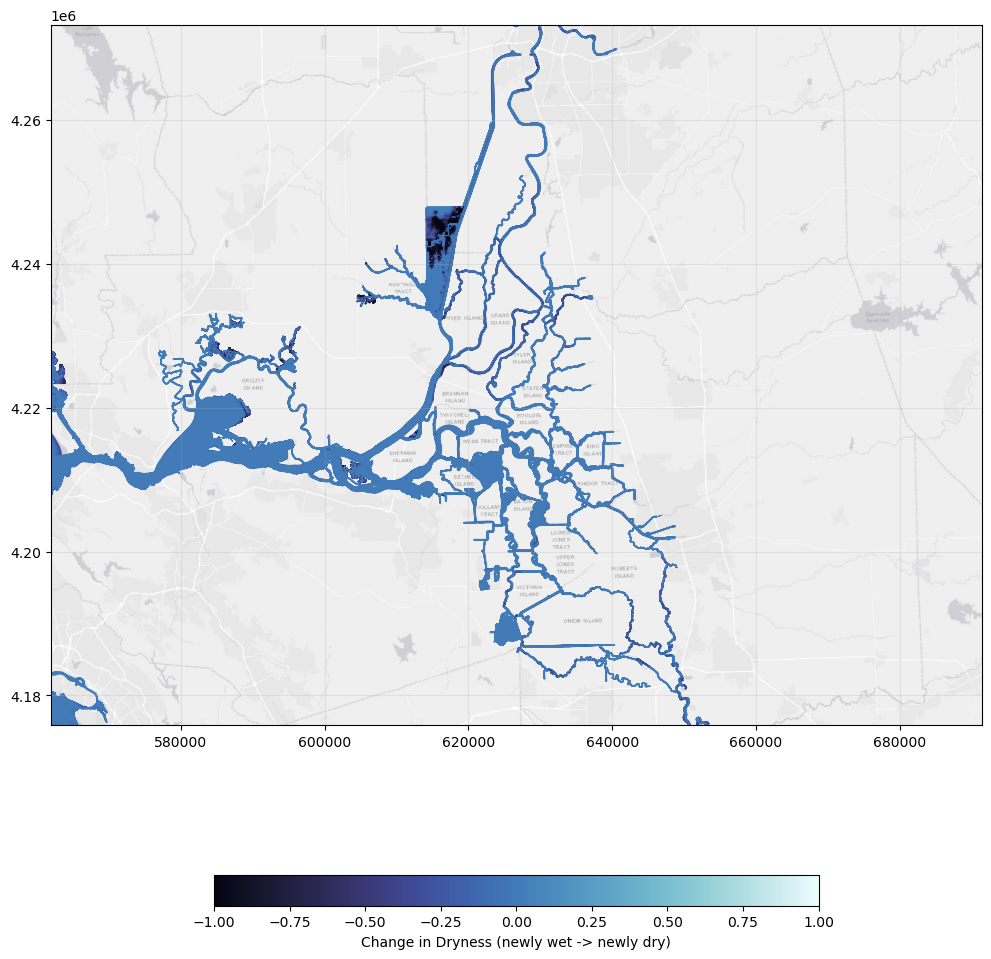

In [ ]:
fn = "/global/scratch/users/jennaisrael/run_schism/run_26/outputs/"
run = spl.SchismOutput(output_folder=fn)

In [ ]:
#run.read_grid()

In [ ]:
ds = run.Result(run, variable = "elevation", filenumber=147)

In [ ]:
fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time="average",depth= "2D",titlestr="Elevation 08/23/2014")

In [ ]:
run.get_types_of_output()

In [ ]:
ds = run.Result(run, variable = "salinity", filenumber=100)

In [ ]:
dataset.dryFlagNode

In [ ]:
np.sum(np.array(dataset.dryFlagNode))